In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sn
import statistics as st

#logistic regression
from sklearn.linear_model import LogisticRegression 

#linear discriminant analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.metrics import confusion_matrix

#quadratic discriminant analysis (QDA)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA #QDA

#K nearest neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier as KNN

# Lab

# 4.6.1 The Stock Market Data

In [3]:
#Read dataset from R
Smarket = sm.datasets.get_rdataset("Smarket","ISLR").data

In [6]:
list(Smarket.columns)

['Year',
 'Lag1',
 'Lag2',
 'Lag3',
 'Lag4',
 'Lag5',
 'Volume',
 'Today',
 'Direction']

In [7]:
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [8]:
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


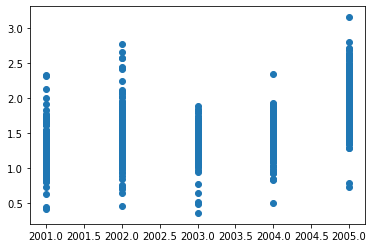

In [11]:
plt.scatter(Smarket.Year,Smarket.Volume)

As one would expect, the correlations between the lag variables and to- day’s returns are close to zero. In other words, there appears to be little correlation between today’s returns and previous days’ returns. The only substantial correlation is between Year and Volume. By plotting the data we see that Volume is increasing over time. In other words, the average number of shares traded daily increased from 2001 to 2005.

# 4.6.2 Logistic Regression

In [14]:
#Logistic Model Regression

predictors = Smarket.columns[1:7]
X = sm.add_constant(Smarket[predictors])
Y = pd.Series([1 if el=='Up' else 0 for el in Smarket.Direction.values],index=X.index)
logit = sm.Logit(Y,X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sun, 23 Feb 2020   Pseudo R-squ.:                0.002074
Time:                        14:44:08   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

The smallest p-value here is associated with `Lag1`. The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. However, at a value of 0.15, the p-value is still relatively large, and so there is no clear evidence of a real association between `Lag1` and `Direction`.

In [17]:
# Split the data into training and test dataframes
train = Smarket[Smarket.Year<2005]
Smarket_2005 = Smarket[Smarket.Year>=2005]

len(Smarket_2005)

252

In [20]:
train.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [28]:
import warnings
warnings.filterwarnings('ignore') #hide warnings

#Predict 
X_train = train[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']].values
X_test = Smarket_2005[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']].values

y_train = train['Direction'].values
y_test = Smarket_2005['Direction'].values


lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.4880952380952381

In [32]:
import warnings
warnings.filterwarnings('ignore') #hide warnings

X_train = train[['Lag1','Lag2']].values
X_test = Smarket_2005[['Lag1','Lag2']].values

y_train = train['Direction'].values
y_test = Smarket_2005['Direction'].values


lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.5595238095238095

Now the results appear to be a little better: 56% of the daily movements have been correctly predicted. It is worth noting that in this case, a much simpler strategy of predicting that the market will increase every day will also be correct 56% of the time! Hence, in terms of overall error rate, the logistic regression method is no better than the na ̈ıve approach. However, the confusion matrix shows that on days when logistic regression predicts an increase in the market, it has a 58% accuracy rate. This suggests a possible trading strategy of buying on days when the model predicts an in- creasing market, and avoiding trades on days when a decrease is predicted. Of course one would need to investigate more carefully whether this small improvement was real or just due to random chance.

# #4.6.3 Linear Descrinminant Analysis

In [123]:
lda=LDA()
model1 = lda.fit(X_train, y_train)
print(model1.coef_)

[[-0.05544078 -0.0443452 ]]


In [124]:
#Prior probabilities of groups :
print(model2.priors_)
#   Down        Up

[0.49198397 0.50801603]


In [127]:
#Group means :
print(model1.means_)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [128]:
print(model1.scalings_)

[[-0.64201904]
 [-0.51352928]]


In [129]:
#Accuracy :
accuracy_score(y_test, lda.predict(X_test))

0.5595238095238095

The LDA output indicates that πˆ = 0.492 and πˆ = 0.508; in other words, 12
49.2% of the training observations correspond to days during which the market went down. It also provides the group means; these are the average of each predictor within each class, and are used by LDA as estimates of μk. These suggest that there is a tendency for the previous 2 days’ returns to be negative on days when the market increases, and a tendency for the previous days’ returns to be positive on days when the market declines. The coefficients of linear discriminants output provides the linear combination of Lag1 and Lag2 that are used to form the LDA decision rule. In other words, these are the multipliers of the elements of X = x in (4.19). If −0.642 × Lag1 − 0.514 × Lag2 is large, then the LDA classifier will predict a market increase, and if it is small, then the LDA classifier will predict a market decline. The plot() function produces plots of the linear discriminants, obtained by computing −0.642 × Lag1 − 0.514 × Lag2 for each of the training observations.

# 4.6.4 Quadratic Discriminant Analysis

In [50]:
qda = QDA()
model2 = qda.fit(X_train, y_train)

#Prior probabilities of groups :
print(model2.priors_)
#   Down        Up

[0.49198397 0.50801603]


In [53]:
#Group means :
print(model2.means_)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [54]:
#Accuracy :
accuracy_score(y_test, qda.predict(X_test))

0.5992063492063492

Interestingly, the QDA predictions are accurate almost 60% of the time, even though the 2005 data was not used to fit the model. This level of accu- racy is quite impressive for stock market data, which is known to be quite hard to model accurately. This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. However, we recommend evaluating this method’s performance on a larger test set before betting that this approach will consistently beat the market!

# 4.6.5 K-Nearest Neighbors

KNN works rather differently from the other model- fitting functions that we have encountered thus far. Rather than a two-step approach in which we first fit the model and then we use the model to make predictions, it forms predictions using a single command.

In [55]:
def KNN_N(k):
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(acc)

In [56]:
KNN_N(1)

0.5


The results using K = 1 are not very good, since only 50 % of the observa- tions are correctly predicted. Of course, it may be that K = 1 results in an overly flexible fit to the data. Below, we repeat the analysis using K = 3.

In [57]:
KNN_N(3)

0.5317460317460317


The results have improved slightly. But increasing K further turns out to provide no further improvements. It appears that for this data, QDA provides the best results of the methods that we have examined so far.

# 4.6.6 An Application to Caravan Insurance Data

In [91]:
#Read dataset from R
Caravan = sm.datasets.get_rdataset("Caravan","ISLR").data
len(Caravan)

5822

In [60]:
Caravan.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [61]:
pd.crosstab(index=Caravan["Purchase"],  # Make a crosstab
                              columns="count")      # Name the count column

col_0,count
Purchase,
No,5474
Yes,348


In [62]:
348/5822

0.05977327378907592

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale. For instance, imagine a data set that contains two variables, salary and age (measured in dollars and years, respectively). As far as KNN is concerned, a difference of 1,000 in salary is enormous compared to a difference of 50 years in age. Conse- quently, salary will drive the KNN classification results, and age will have almost no effect. This is contrary to our intuition that a salary difference of $1, 000 is quite small compared to an age difference of 50 years. Further- more, the importance of scale to the KNN classifier leads to another issue: if we measured salary in Japanese yen, or if we measured age in minutes, then we’d get quite different classification results from what we get if these two variables are measured in dollars and years.
A good way to handle this problem is to standardize the data so that all variables are given a mean of zero and a standard deviation of one. Then all variables will be on a comparable scale. The scale() function does just this. In standardizing the data, we exclude column 86, because that is the qualitative Purchase variable.

In [64]:
import sklearn as sk

In [85]:
#Scale variable 'purchase'
standardized_x = Caravan.drop(columns="Purchase")
standardized_x = sk.preprocessing.scale(standardized_x , axis=0, with_mean=True, with_std=True, copy=True)
standardized_x = pd.DataFrame(standardized_x)

In [102]:
# Split the data into training and test dataframes
train_X = standardized_x[:1000]
test_X = standardized_x[-4822:]

Purchase = Caravan.Purchase
train_y = Purchase.head(1000)
test_y = Purchase.tail(4822)

In [112]:
def KNN_N(k):
    knn = KNN(n_neighbors=k)
    knn.fit(train_X, train_y)
    acc = accuracy_score(test_y, knn.predict(test_X))
    print(acc)

In [113]:
KNN_N(1)

0.8890501866445458


We now split the observations into a test set, containing the first 1,000 observations, and a training set, containing the remaining observations. We fit a KNN model on the training data using K = 1, and evaluate its performance on the test data.

In [114]:
KNN_N(3)

0.9253421816673579


Using K = 3, the success rate increases to 19 %, and with K = 5 the rate is 26.7 %. This is over four times the rate that results from random guessing. It appears that KNN is finding some real patterns in a difficult data set!

In [115]:
KNN_N(5)

0.9365408544172542


In [140]:
#Logistic regression
import warnings
warnings.filterwarnings('ignore') #hide warnings

lr.fit(train_X,train_y)
pred_y = lr.predict(test_X)
confusion_matrix = confusion_matrix(test_y, pred_y)
print(confusion_matrix)

[[4488   45]
 [ 277   12]]


As a comparison, we can also fit a logistic regression model to the data. If we use 0.5 as the predicted probability cut-off for the classifier, then we have a problem: only seven of the test observations are predicted to purchase insurance. Even worse, we are wrong about all of these! However, we are not required to use a cut-off of 0.5. If we instead predict a purchase any time the predicted probability of purchase exceeds 0.25, we get much better results: we predict that 33 people will purchase insurance, and we are correct for about 33% of these people. This is over five times better than random guessing!

# #10

In [ ]:
#Read dataset from R
Weekly=sm.datasets.get_rdataset("Weekly", "ISLR").data

## (a)

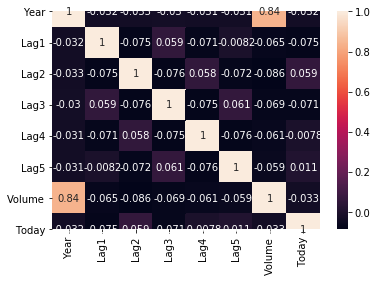

In [5]:
corrMatrix=Weekly.corr()
sn.heatmap(corrMatrix, annot=True)

`Year` and `Volume` are positively correlated similar to the `Smarket` data set.

## (b)

In [8]:
#Logistic Model Regression

predictors = Weekly.columns[2:7]
X = sm.add_constant(Weekly[predictors])
Y = pd.Series([1 if el=='Up' else 0 for el in Weekly.Direction.values],index=X.index)
logit = sm.Logit(Y,X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.683570
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 Feb 2020   Pseudo R-squ.:                0.004937
Time:                        00:16:36   Log-Likelihood:                -744.41
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1935
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2528      0.085      2.962      0.003       0.085       0.420
Lag2           0.0612      0.

Only `Lag2` has statistically significant predictive value.

## (c)

In [9]:
#Confusion Matrix

table = results.pred_table(threshold=0.5)
confusion_df= pd.DataFrame(table,['Down','Up'],['Down','Up'])
print(confusion_df)
print('')
print('The model made', (confusion_df.Down[0]+confusion_df.Up[1])/confusion_df.sum().sum(), '% correct predictions on the TRAINING SET.')

      Down     Up
Down  38.0  446.0
Up    31.0  574.0

The model made 0.5619834710743802 % correct predictions on the TRAINING SET.


## (d)

In [10]:
# Split the data into training and test dataframes
training_df= Weekly[Weekly.Year<2009]
test_df= Weekly[Weekly.Year>=2009]
predictors = training_df.columns[2] #Lag2
# Create the design matrix for the training_df
X_train= sm.add_constant(training_df[predictors])
Y_train= pd.Series([1 if el=='Up' else 0 for el in training_df.Direction.values],index=X_train.index)
# fit the model and return the training results
train_logit= sm.Logit(Y_train,X_train)
train_results= train_logit.fit()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


## (e)

In [12]:
#getting data ready
X = training_df['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

#linear discriminant analysis (LDA)
lda = LDA()
lda.fit(X,training_df['Direction'])
LDA(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
#getting data ready
X = test_df['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

#confusion matrix
conf_mat = confusion_matrix(test_df['Direction'], lda.predict(X))
print(conf_mat)

[[ 9 34]
 [ 5 56]]


In [13]:
#overall fraction of correct predictions

lda.score(X, test_df['Direction'])

0.625

## (f)

In [15]:
#getting data ready
X = training_df['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

#quadratic discriminant analysis (QDA)
qda = QDA()
qda.fit(X,training_df['Direction'])
QDA(priors=None, reg_param=0.0,
               store_covariance=False, tol=0.0001)
#getting data ready
X = test_df['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

#confusion matrix
conf_mat = confusion_matrix(test_df['Direction'], qda.predict(X))
print(conf_mat)

[[ 0 43]
 [ 0 61]]


In [16]:
qda.score(X, test_df['Direction'])

0.5865384615384616

## (g)

In [18]:
#getting data ready
X = training_df['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

#creating an instance of Neighbours Classifier and fitting the data
nbrs = KNN(n_neighbors=1)
nbrs.fit(X,training_df['Direction'])
KNN(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
#getting data ready
X = test_df['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

#confusion matrix
conf_mat = confusion_matrix(test_df['Direction'], nbrs.predict(X))
print(conf_mat)

[[21 22]
 [31 30]]


In [19]:
#overall fraction of correct predictions

nbrs.score(X,test_df['Direction'])

0.49038461538461536

## (h)

The **Logistic Regression**(0.686) and **LDA models**(0.625) produced the best results.

## (i)

In [20]:
def KNN_N(n):
    #trying with a different number of neighbors
    n_nbrs = n
    #getting data ready for the neigb
    X = training_df['Lag2']
    X = X.values.reshape(np.shape(X)[0],1)

    #creating an instance of Neighbours Classifier and fitting the data
    nbrs = KNN(n_neighbors=n)
    nbrs.fit(X,training_df['Direction'])

    #getting data ready for the confusion matrix
    X = test_df['Lag2']
    X = X.values.reshape(np.shape(X)[0],1)

    #confusion matrix
    conf_mat = confusion_matrix(test_df['Direction'], nbrs.predict(X))
    print(conf_mat)
    
    print(nbrs.score(X,test_df['Direction']))

In [21]:
#KNN for k=5
KNN_N(5)

[[16 27]
 [22 39]]
0.5288461538461539


In [22]:
#KNN for k=10
KNN_N(10)

[[22 21]
 [24 37]]
0.5673076923076923


In [23]:
#KNN for k=20
KNN_N(20)

[[23 20]
 [22 39]]
0.5961538461538461


In [24]:
#KNN for k=30
KNN_N(30)

[[21 22]
 [27 34]]
0.5288461538461539


When k=20, it seemed to produce the best results when using only `Lag2` as predictor.

# #11

In [27]:
#Read dataset from R
Auto=sm.datasets.get_rdataset("Auto", "ISLR").data

# (a)

In [28]:
import statistics as st

Auto['mpg01']= np.where(Auto['mpg'] > st.median(Auto['mpg']), 1, 0)

# (b)

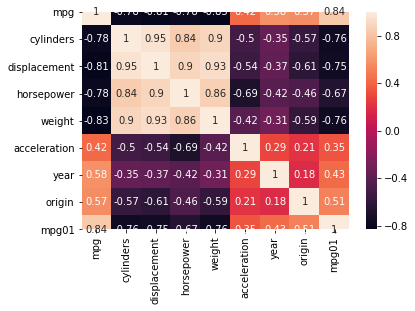

In [29]:
corrMatrix=Auto.corr()
sn.heatmap(corrMatrix, annot=True)

The correltion matrix above indicated that `cylinders`, `displacement`, and `weight` seem to be highly correlated.

# (c)

In [30]:
#Split dataset

from sklearn.model_selection import train_test_split

X=Auto[['cylinders','displacement','weight']].values
y=Auto['mpg01'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# (d)

In [31]:
#LDA
from sklearn.metrics import accuracy_score

lda=LDA()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.8461538461538461

# (e)

In [32]:
#QDA

qda = QDA()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.8769230769230769

# (f)

In [33]:
#Logistic Regression

import warnings
warnings.filterwarnings('ignore') #hide warnings

from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.8538461538461538

# (g)

In [34]:
#KNN

def KNN_N(k):
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(acc)

In [35]:
KNN_N(1)

0.8538461538461538


In [36]:
KNN_N(5)

0.8307692307692308


In [37]:
KNN_N(10)

0.823076923076923


From the results above indicated that when k=1, the KNN performed the best.

# #12

# (a)

In [38]:
def Power():
    print(2**3)

In [39]:
Power()

8


# (b)

In [40]:
def Power2(x,a):
    print(x**a)

In [41]:
Power2(3,8)

6561


# (c)

In [42]:
Power2(10,3)

1000


In [43]:
Power2(8,17)

2251799813685248


In [44]:
Power2(131,3)

2248091


# (d)

In [45]:
def Power3(x,a):
    result = x**a
    return result

# (e)

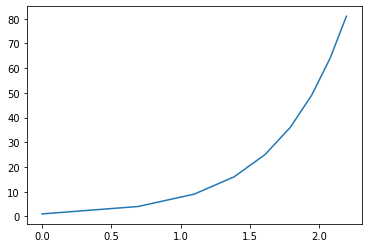

In [46]:
x = np.arange(1,10)
y = Power3(x,2)
x = np.log(x) #log=‘‘x’’

plt.plot(x,y)

# (f)

In [47]:
def PlotPower(x1,x2,a):
    x = np.arange(x1,x2)
    y = Power3(x,a)
    plt.plot(x,y)

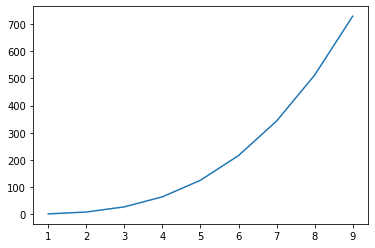

In [48]:
PlotPower(1,10,3)

# #13

In [49]:
#Read dataset from R
Boston=sm.datasets.get_rdataset("Boston", "MASS").data

In [50]:
#Create response variable
Boston['crim01'] = np.where(Boston['crim'] > st.median(Boston['crim']), 1, 0) 

In [51]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [54]:
Boston = Boston.drop('crim', axis=1)

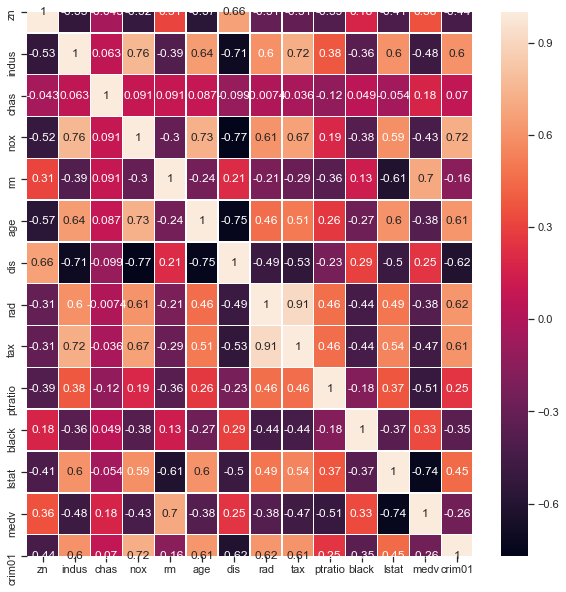

In [57]:
#Correlation matrix

corrMatrix=Boston.corr()

fig, ax = plt.subplots(figsize=(10,10)) 
sn.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

The results above showed that `indus`, `nox`, `age`, `dis`, `rad`, and `tax` have higher correlation in all predictors (>0.6).

In [58]:
X=Boston[['indus','nox','age','dis','rad','tax']].values
y=Boston['crim01'].values

#Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Then, we splitted the dataset into training and test set in order to predict outcomes. 

In [59]:
#Logistic Regression

import warnings
warnings.filterwarnings('ignore') #hide warnings

lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.8083832335329342

Firstly, we built a logistic regression model, the accuracy is 0.808.

In [60]:
#LDA

lda=LDA()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.8143712574850299

Secondly, we applied linear discriminant analysis (LDA), the accuracy is 0.814.

In [61]:
#QDA

qda = QDA()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.8622754491017964

Thirdly, we applied quadratic discriminant analysis (QDA), the accuracy is higher than the first two methods.

In [63]:
#KNN

def KNN_N(k):
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(acc)

In [64]:
KNN_N(1)

0.874251497005988


From the results above, we can see that the best model was KNN with k = 1. For a more robust analysis we should perform cross-validation.